# Monitoring changes in $NO_{2}$ concentration from space

## Introduction<a class="anchor" id="1"></a>

Nitrogen oxides (NOx) are group of highly reactive gases, Nirogen Dioxide (NO2) is a major trace gases of the group. The main source of NO2 emission in the atmosphere is fossil fuel burning, it can be through power plants, vehicles, etc. Acid rain is a resultant of NO2 interaction with water, oxygen in the atmosphere. High amount of NO2 causes smog and nutrient pollution in coastal water. 

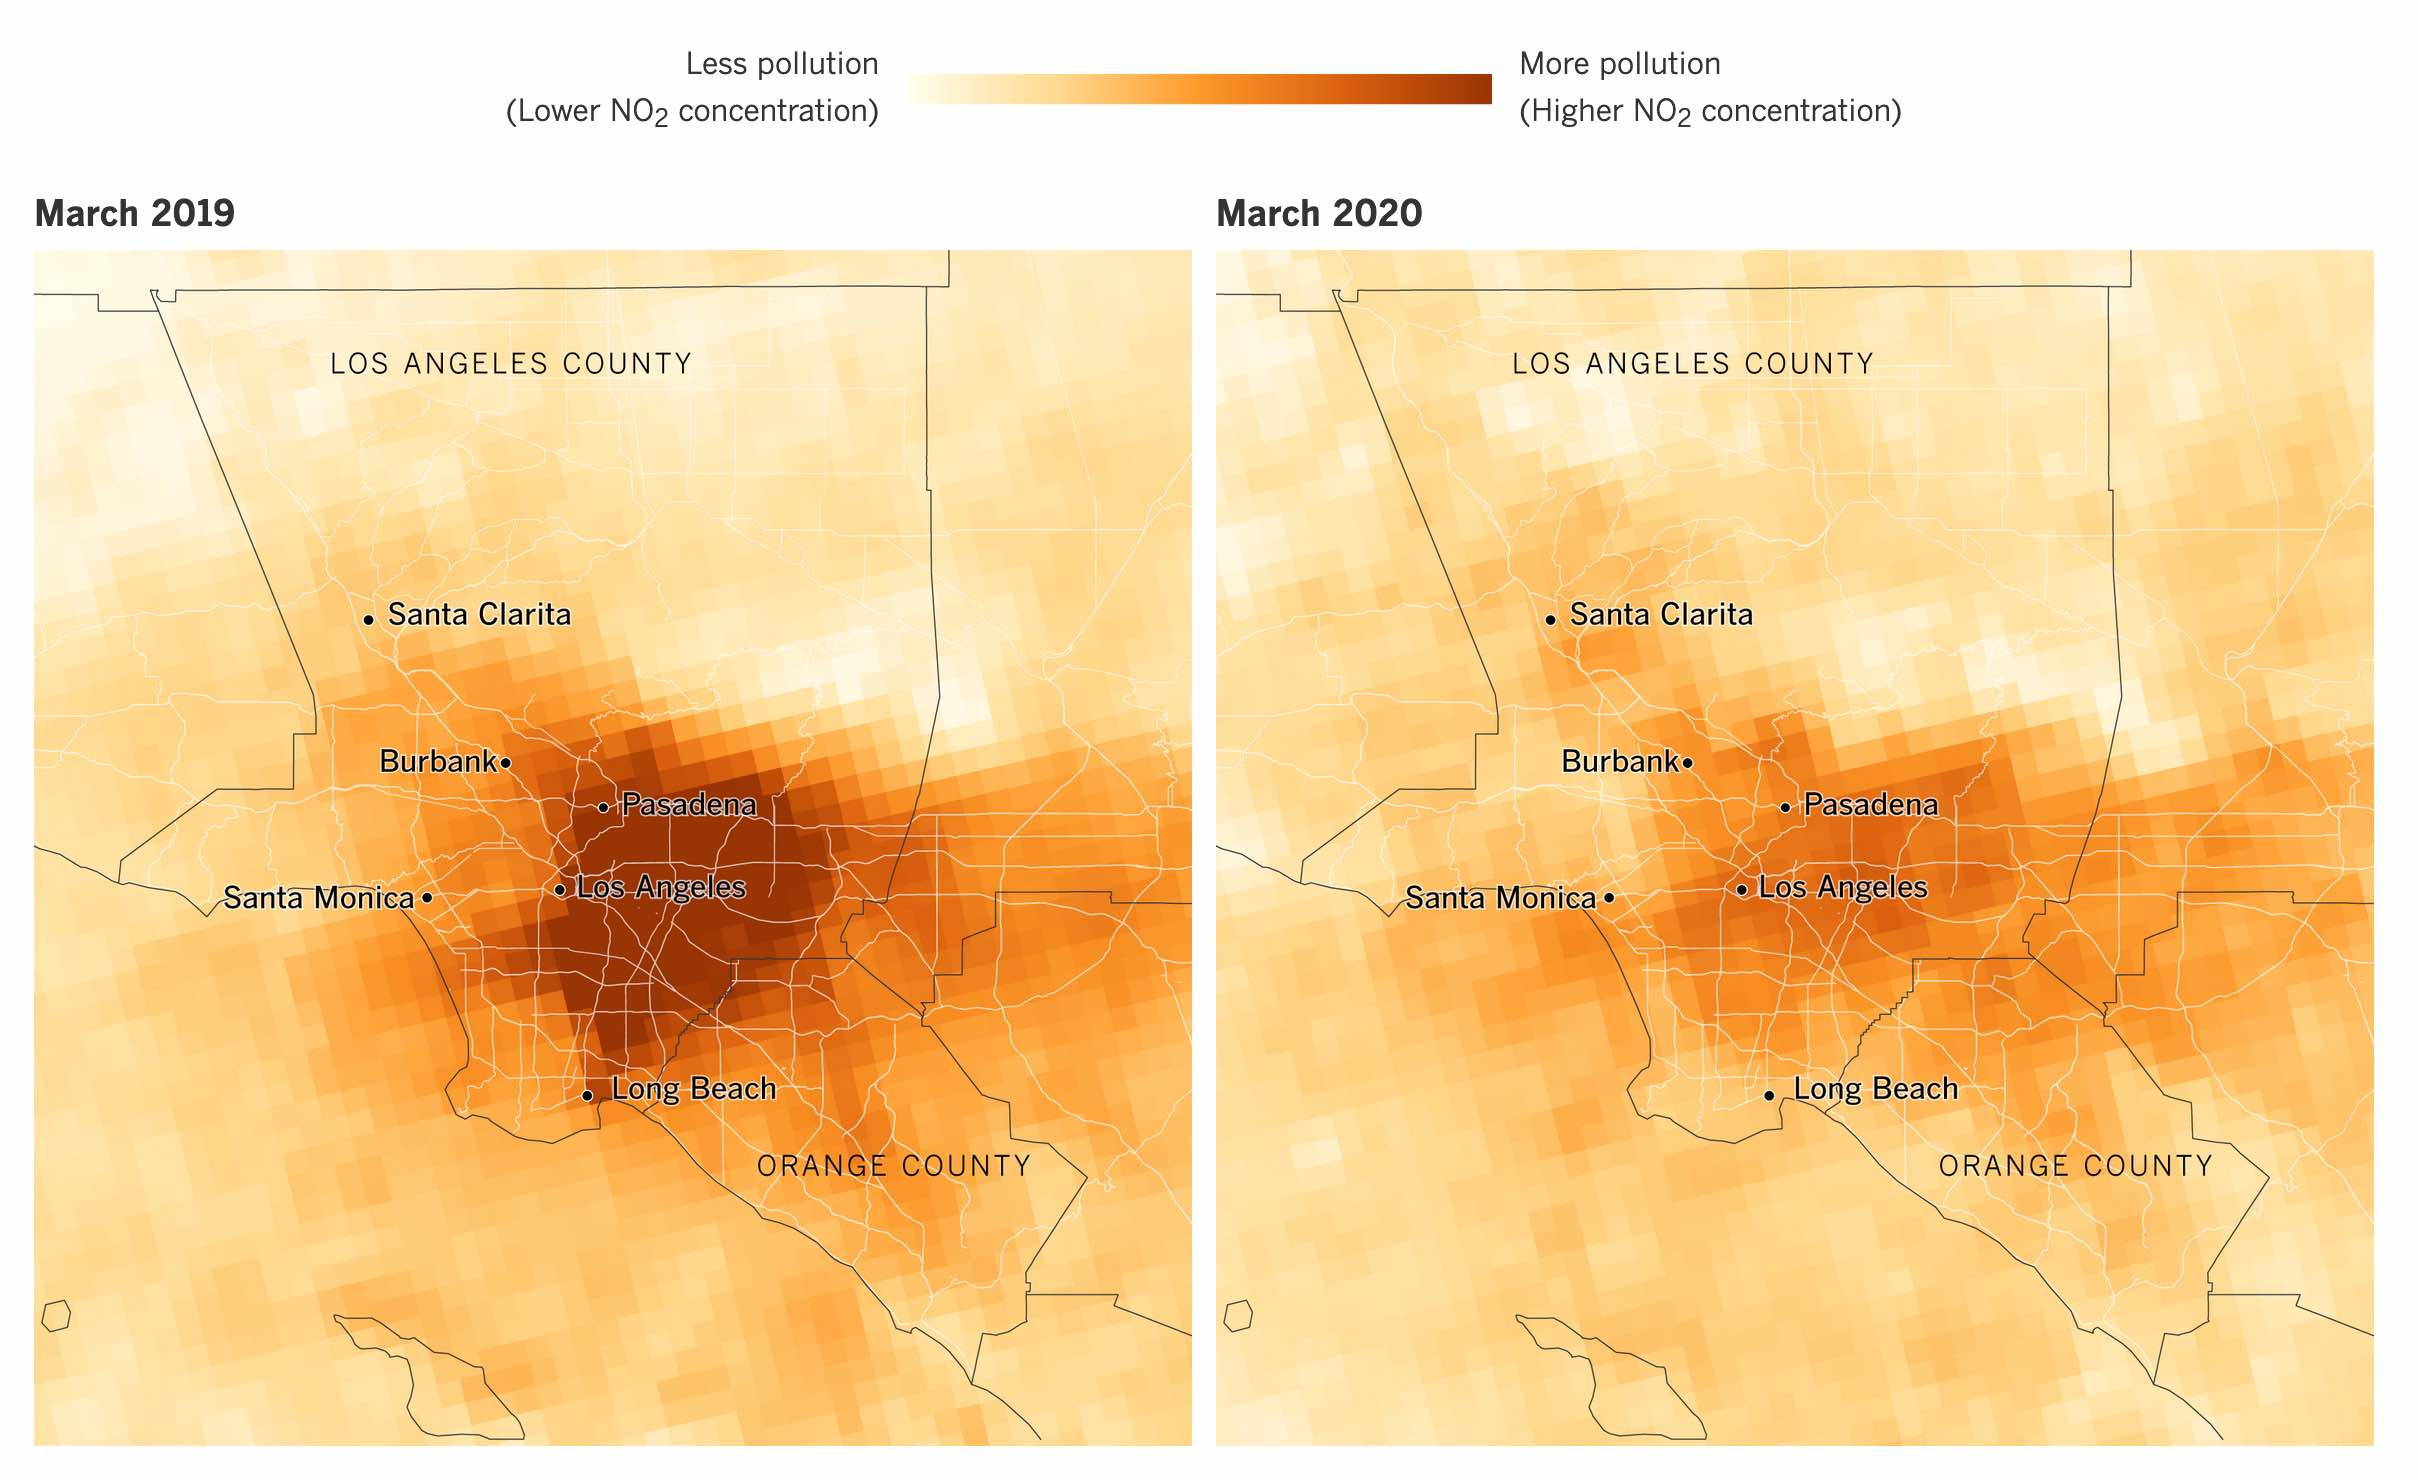
<center><i>Source: LA Times article: <a href="https://www.latimes.com/projects/los-angeles-coronavirus-slowdown-maps/">As Los Angeles confronts coronavirus, a slower city is visible from above</a></i></center>

China is one of the major contributer of NO2 emission in atmosphere due to urbanization, industrial and economic growth.Wuhan is the capital of Hubei province and most populous city of Central China. An epidemic of Coronavirus developed in Wuhan in December of 2019 which spread worldwide and became COVID-19 pandemic. Wuhan was locked down for approximatley three months to stop the spreading of the virus. The lockdown resulted in the decline of not only COVID cases but also the atmospheric NO2 concentration of the region.

As satellite remote sensing data is able to cover both the spatial distribution and temporal variation of atmospheric gases, it is widely accepted over the traditional atmosphere monitoring techniques.[The Sentinel-5 Precursor](https://sentinel.esa.int/web/sentinel/missions/sentinel-5p) is ESA's first Copernicus mission exclusively for atmospheric monitoring. The mission has one satellite containing TROPOspheric Monitoring Instrument (TROPOMI). 

[NO2 data product](https://sentinel.esa.int/documents/247904/2474726/Sentinel-5P-Level-2-Product-User-Manual-Nitrogen-Dioxide) is used in the current study to study the changes in the NO2 concentration due to COVID-19 lockdown.   

## Necessary imports<a class="anchor" id="2"></a>

In [24]:
import arcgis
import os, datetime, time
from datetime import datetime
from arcgis.gis import GIS
from ipywidgets import HBox, VBox, Label, Layout

## Connect to your GIS<a class="anchor" id="3"></a>

In [3]:
gis = GIS("home")

## Visualise Results <a class="anchor" id="17"></a>

### Create map wigets<a class="anchor" id="21"></a>

8 map wigets were created representing the 8 days. In these map widgets, the data will be added in the next section.

In [26]:
map1 = gis.map("China", 4)
map1.basemap = 'topo-vector'
map2 = gis.map("China", 4)
map2.basemap = 'streets-vector'
map3 = gis.map("China", 4)
map3.basemap = 'topo-vector'

In [27]:
hbox_layout = Layout()
hbox_layout.justify_content = 'space-around'

hb1 = HBox([Label('31-Dec-19'),Label('29-Jan-20'), Label('20-Mar-20')])
hb2 = HBox([map1, map2, map3])
hb1.layout,hb2.layout = hbox_layout, hbox_layout

In [28]:
VBox([hb1,hb2])

### Synchronize web maps<a class="anchor" id="23"></a>

All the maps were synchronized with each other using [MapView.sync_navigation](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.sync_navigation) functionality. It will help in comparing the changes in NO2 concentration with time. Detailed description about advanced map widget options can be refered from [here](https://developers.arcgis.com/python/guide/advanced-map-widget-usage/)

In [29]:
map1.sync_navigation(map2)
map2.sync_navigation(map3)

### Get NO2 interpolations

In [30]:
dec31 = gis.content.get('940d3830d8ad440b8b4f41aaeabc5afa')
jan29 = gis.content.get('c7a49344c21a42a08d238e4e2bab6bab')
mar20 = gis.content.get('80eed0e600ff456b9bb63718e5734574')

In [31]:
# read the layers
dec31_df = dec31.layers[0].query(as_df=True)
jan29_df = jan29.layers[0].query(as_df=True)
mar20_df = mar20.layers[0].query(as_df=True)

In [32]:
# plot the dataframes
map_list = [map1, map2, map3]
df_list = [dec31_df, jan29_df, mar20_df]

for now_map, now_df in zip(map_list, df_list):
    time.sleep(2)
    now_df.spatial.plot(map_widget=now_map,
                       renderer_type='c',
                       method='esriClassifyNaturalBreaks',
                       class_count=8,
                       col='classes',
                       cmap='jet',
                       outline_color=[0,0,0,0],
                       alpha=0.55)

## Conclusion<a class="anchor" id="18"></a>

Wuhan is one of the most populous city of China which is related high economic growth, industries, large number of vehicles, etc. With urbanisation and industrial growth pollution also increases, suggesting high concentration of NO2. To control the spread COVID-19 Epidemic the city was locked down and all the industries, vehicles and other sources of NO2 emission were stopped. Due to which the NO2 levels in the atmosphere also decreases after lockdown over Wuhan. Sentinel-5P NO2 data product was used for studying the spatial variations of NO2 concentration in atmosphere over time. The results of the study suggests that the NO2 concentration over Wuhan was decreased after the COVID-19 lockdown. The same methodology can be used to study the NO2 concentration for different regions with Sentinel-5P NO2 data product using ArcGIS platform.  

## Data Resources<a class="anchor" id="19"></a>

| Data and literature | Source | Link |
| -| - |-|
| Sentinel-5P NO2 Product|          Sentinel-5P Pre-Operations Data Hub | https://s5phub.copernicus.eu/dhus/#/home| 
|User Manual|                       Sentinel-5P Level 2 User Manual        | https://sentinel.esa.int/documents/247904/2474726/Sentinel-5P-Level-2-Product-User-Manual-Nitrogen-Dioxide|
| Research Paper|                   Spatial Variation of NO2 and Its Impact Factors in China: An Application of Sentinel-5P Products           | https://www.researchgate.net/publication/335249253_Spatial_Variation_of_NO2_and_Its_Impact_Factors_in_China_An_Application_of_Sentinel-5P_Products|
| Research Paper|                   Spaceborne Nitrogen Dioxide Observations from the Sentinel-5P TROPOMI over Turkey           |   https://www.mdpi.com/2504-3900/18/1/4/pdf|